# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
import random
p = 0.3
train = pd.read_csv(
         'avito-text-classification/train.csv',
         skiprows=lambda i: i > 0 and random.random() > p
)
# train = pd.read_csv('avito-text-classification/train.csv', nrows=100000)
# test = pd.read_csv('avito-text-classification/test.csv')

In [3]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269405 entries, 0 to 1269404
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   title          1269405 non-null  object
 1   description    1269405 non-null  object
 2   Category_name  1269405 non-null  object
 3   Category       1269405 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2 GB


In [4]:
train

,title,description,Category_name,Category
0,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
1,Сандали котофей,"Котофей фирма, на первые шаги. Размер 20",Детская одежда и обувь,29
2,Кулак поворотный задний правый Nissan Teana J32,Кулак поворотный Nissan Teana J32 2.5 QR25DE 2...,Запчасти и аксессуары,10
3,Самбовка,"Продаётся форма для самбо,носили только месяц....",Спорт и отдых,39
4,Чехлы из экокожи на Toyota Prado 150 от Автопилот,Модельные авточехлы из экокожи Премиум класса ...,Запчасти и аксессуары,10
...,...,...,...,...
1269400,"ВАЗ 2114 Samara, 2005","Двигатель работает хорошо, есть рыжики по кузо...",Автомобили,9
1269401,Дверь передняя правая Фольксваген Пассат Б6,Дверь передняя правая Фольксваген Пассат Б6 20...,Запчасти и аксессуары,10
1269402,Мопед Дельта Мотоланд 70 кубиков,Продам новый мопед Дельта купленный 18 июня 20...,Мотоциклы и мототехника,14
1269403,Шерстяной комбинезон Joha,"В отличном состоянии. Мягкий, приятный к телу....",Детская одежда и обувь,29


In [5]:
# test

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
train.isna().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [7]:
train['feature'] = train['title'] + ' ' + train['description']
train.drop(columns=['title', 'description'], inplace=True)
train = train[['feature', 'Category_name', 'Category']]

In [8]:
train

,feature,Category_name,Category
0,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...,Бытовая техника,21
1,"Сандали котофей Котофей фирма, на первые шаги....",Детская одежда и обувь,29
2,Кулак поворотный задний правый Nissan Teana J3...,Запчасти и аксессуары,10
3,"Самбовка Продаётся форма для самбо,носили толь...",Спорт и отдых,39
4,Чехлы из экокожи на Toyota Prado 150 от Автопи...,Запчасти и аксессуары,10
...,...,...,...
1269400,"ВАЗ 2114 Samara, 2005 Двигатель работает хорош...",Автомобили,9
1269401,Дверь передняя правая Фольксваген Пассат Б6 Дв...,Запчасти и аксессуары,10
1269402,Мопед Дельта Мотоланд 70 кубиков Продам новый ...,Мотоциклы и мототехника,14
1269403,Шерстяной комбинезон Joha В отличном состоянии...,Детская одежда и обувь,29


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

###### Число классов:

In [9]:
len(train['Category'].value_counts())

50

###### Распределение классов:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

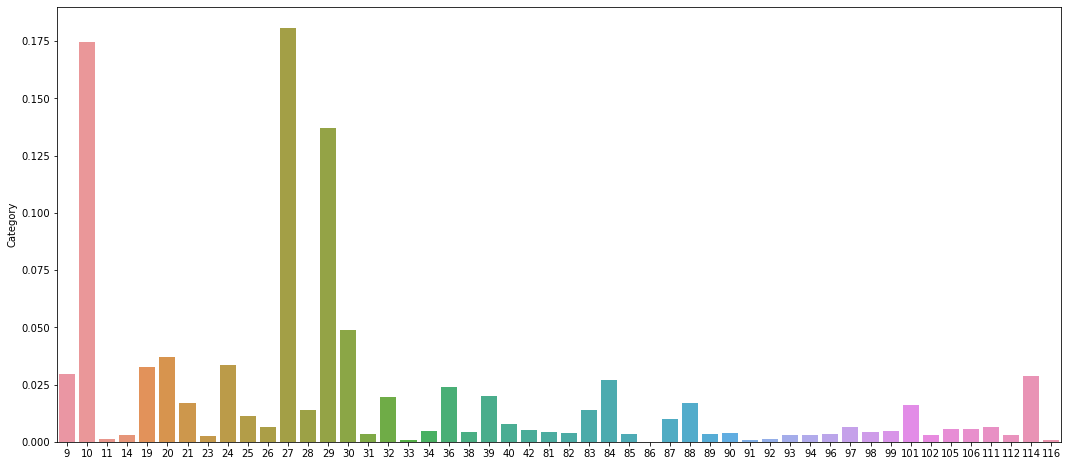

In [11]:
classes_dist = train['Category'].value_counts(normalize=True)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
sns.barplot(x=classes_dist.index, y=classes_dist)

###### Дисбаланс классов:

Визуально кажется, что дисбаланс довольно большой, но есть разные варианты, как его квантифицировать. Можно, например, посчитать индекс Джини. <br>Чем ближе данный индекс к 0, тем более равномерным является распределение. Индекс Джини близкий к 1 сигнализирует о крайне неравномерном распределении величины. <br> Функция для подсчета индекса Джини была скопипастена со стаковерфлоу!

In [12]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    import numpy as np
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [13]:
gini_coefficient(classes_dist)

0.6888663744037561

Видим, что классы распределены довольно неравномерно. 

Есть несколько явных лидеров. Это классы 10, 27 и 29. 

In [14]:
train[train['Category'].isin([10, 27, 29])][['Category_name', 'Category']].drop_duplicates()

,Category_name,Category
1,Детская одежда и обувь,29
2,Запчасти и аксессуары,10
5,"Одежда, обувь, аксессуары",27


In [15]:
print(f'Максимум: {classes_dist.max()} - доля для класса {classes_dist.index[classes_dist.argmax()]}')
print(f'Минимум: {classes_dist.min()} - доля для класса {classes_dist.index[classes_dist.argmin()]}')

Максимум: 0.18083038904053475 - доля для класса 27
Минимум: 3.938853242267046e-05 - доля для класса 86


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['feature'])
X.shape[1]

1025684

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [17]:
import string
vocabulary = pd.DataFrame(cnt_vec.vocabulary_.items(), 
                          columns=['Word', 'cnt']).sort_values(by=['cnt'], 
                                                               ascending=False)


Слова, начинающиеся на цифру:

In [18]:
vocabulary[vocabulary['Word'].str[0].str.isdigit()].shape[0]

246477

Слова, начинающиеся на знак пунктуации:

In [19]:
vocabulary[vocabulary['Word'].str[0].isin([x for x in string.punctuation])].shape[0]

846

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [2]:
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [5]:
stoppies = set(stopwords.words('russian'))
filter_alphas = np.vectorize(lambda x: True if x.isalpha() else False, otypes=[bool])
vectorized_stemmer = np.vectorize(SnowballStemmer('russian').stem, otypes=[str])

def my_tokenizer(s):
    """
    s - строка
    """
    s = set(word_tokenize(s.lower())) - stoppies  # Удаляем стоп-слова
    
    s = np.array(list(s))
    s = s[filter_alphas(s)]  # Оставляем лишь те токены, что не содержат цифр и пунктуации
    
    return vectorized_stemmer(s)

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [40]:
%%time
cnt_vec = CountVectorizer(tokenizer=my_tokenizer)
X = cnt_vec.fit_transform(train.sample(500000, random_state=7)['feature'])

CPU times: user 19min 13s, sys: 3.1 s, total: 19min 16s
Wall time: 19min 19s


In [41]:
X.shape[1]

188332

In [43]:
y = train.sample(500000, random_state=7)['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [44]:
clf = SGDClassifier(max_iter=1000, tol=1e-3, learning_rate='adaptive', eta0=1)


In [45]:
%%time

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
print(f'Accuracy = {(y_hat_test == y_test).mean()}')

Accuracy = 0.86191
CPU times: user 7min 41s, sys: 2.28 s, total: 7min 43s
Wall time: 6min 23s


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [46]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
X = tfidf.fit_transform(train.sample(500000, random_state=7)['feature'])


CPU times: user 19min 43s, sys: 2.7 s, total: 19min 46s
Wall time: 19min 47s


In [47]:
X.shape[1]

188332

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

clf = SGDClassifier(penalty='l2', alpha=0.000009)

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
print(f'Accuracy = {(y_hat_test == y_test).mean()}')

Accuracy = 0.8751


Сложно сказать, как изменилось качество. Если использовать ровно одинаковые модели, то оно будет чуть ниже, но неясно, значима ли статистически данная разница. <br> После определенных махинаций с параметрами при использовании TF-IDF удалось получить accuracy ~ .858<br> Но кто знает, наверняка при достаточно обширном переборе можно и для обычного bad-of-words добиться такого же значения метрики

###### Теперь уберем df, близкие к единице

In [49]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=my_tokenizer, max_df=.9, min_df=0.0)
X = tfidf.fit_transform(train.sample(500000, random_state=7)['feature'])

CPU times: user 19min 44s, sys: 2.73 s, total: 19min 46s
Wall time: 19min 48s


Размер матрицы:

In [50]:
X.shape[1]

188332

###### При размере выборки в 500 тысяч строк у нас почти не поменялось (или вовсе не поменялось) число признаков!!!
Это просто значит, что в выборке не было слов, которые появляются в 90+ процентах документов

Обучение модели:

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

clf = SGDClassifier(penalty='l2', alpha=0.0000009)

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
print(f'Accuracy = {(y_hat_test == y_test).mean()}')

Accuracy = 0.88032


Accuracy крайне близка к той, что была при обучении на неограниченном tf-idf

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [73]:
%%time
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(tokenizer=my_tokenizer, n_features=30000)
X = hash_vectorizer.fit_transform(train.sample(500000, random_state=7)['feature'])

CPU times: user 19min 38s, sys: 5.61 s, total: 19min 44s
Wall time: 20min 7s


In [74]:
X.shape[1]

30000

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

clf = SGDClassifier(penalty='l2', alpha=0.0000009)

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
print(f'Accuracy = {(y_hat_test == y_test).mean()}')

Accuracy = 0.87081


#### Выводы:
Имхо, на основании полученных метрик делать железные выводы о том, что тот или иной метод сильно лучше - нельзя. 

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

Теперь постараемся обучить нашу модель на большей выборке, немного поищем гиперпараметры и отправим все это дело на каггл

In [9]:
prod_train = pd.read_csv(
         'avito-text-classification/train.csv')

In [10]:
prod_train

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27
...,...,...,...,...
4234037,Мопед Дельта Мотоланд 70 кубиков,Продам новый мопед Дельта купленный 18 июня 20...,Мотоциклы и мототехника,14
4234038,Xiaomi A2 4/64 почти новый (б/у 3 дня),"Xiaomi A2 версия 4/64. /\nВерсия полноценная, ...",Телефоны,84
4234039,Шерстяной комбинезон Joha,"В отличном состоянии. Мягкий, приятный к телу....",Детская одежда и обувь,29
4234040,Джинсы фирмы Zara р.152,Новые,Детская одежда и обувь,29


In [11]:
prod_train['feature'] = prod_train['title'] + ' ' + prod_train['description']
prod_train.drop(columns=['title', 'description'], inplace=True)
prod_train = prod_train[['feature', 'Category_name', 'Category']]

In [12]:
prod_train.isna().sum()

feature          2
Category_name    0
Category         0
dtype: int64

In [13]:
prod_train['feature'].fillna(value='', inplace=True)

C:\Users\ikhrenkov\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
import logging

In [17]:
%%time
logging.info('Начал векторизацию')
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
X_prod = tfidf.fit_transform(prod_train['feature'])
y_prod = prod_train['Category']

Wall time: 2h 13min 52s


In [18]:
X_prod

<4234042x562470 sparse matrix of type '<class 'numpy.float64'>'
	with 104342920 stored elements in Compressed Sparse Row format>

In [19]:
%%time

clf = SGDClassifier(penalty='l2', alpha=0.0000009)

clf.fit(X_prod, y_prod)

Wall time: 7min 49s


SGDClassifier(alpha=9e-07)

Сохраним модель на всякий случай:

In [20]:
import pickle

In [21]:
filename = 'kaggle_version_SGD_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

In [22]:
# loaded_clf = pickle.load(open(filename, 'rb'))  # Чтение модели из файла

In [23]:
del prod_train

kaggle_test = pd.read_csv('avito-text-classification/test.csv')

In [47]:
# del X_prod, y_prod

In [25]:
kaggle_test['feature'] = kaggle_test['title'] + ' ' + kaggle_test['description']
kaggle_test.drop(columns=['title', 'description'], inplace=True)

In [26]:
kaggle_test['feature'].fillna(value='', inplace=True)

In [29]:
%%time

logging.info('Начал векторизацию тестовых данных')
X_kaggle = tfidf.transform(kaggle_test['feature'])

Wall time: 45min 28s


In [30]:
X_kaggle

<1411348x562470 sparse matrix of type '<class 'numpy.float64'>'
	with 34665717 stored elements in Compressed Sparse Row format>

In [31]:
# kaggle_y_hat = loaded_clf.predict(X_kaggle)
kaggle_y_hat = clf.predict(X_kaggle)

In [32]:
kaggle_y_hat

array([27, 27, 32, ..., 29, 84, 27], dtype=int64)

In [33]:
prediction = pd.DataFrame(kaggle_y_hat)

In [34]:
prediction.to_csv('kaggle_pred_raw.csv')

In [38]:
formatted_pred = pd.concat([kaggle_test['itemid'], prediction], axis=1)

In [43]:
formatted_pred.rename(mapper={'itemid': 'Id', 0: 'Category'}, axis=1, inplace=True)

In [49]:
formatted_pred.to_csv('kaggle_pred.csv', index=False)